In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams




***Loading the dataset as a pandas data frame.***

In [ ]:
playdata=pd.read_csv('/content/Play Store Data.csv')

In [ ]:
userreview=pd.read_csv('/content/User Reviews.csv')

In [ ]:
playdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


***After loading the dataset, we can start the exploration but before that, we need to check and see that the dataset is ready for performing different operation***

In [ ]:
userreview.head(10)

In [ ]:
playdata.shape

(10841, 13)

In [ ]:
userreview.shape

***To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.***

In [ ]:
playdata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
userreview.isnull().sum()

***To know the unique values of the dataset  we can use the nuniue() function***

In [ ]:
playdata.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

***Data Preparation and Cleaning***

**We saw that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , andAndroid Ver contains 1474, 1, 1, 8, and 3 missing values respectively.**

**Now we can start the process of data cleaning, lets start with the column Type :-**

In [ ]:
playdata[playdata['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


**Since there is only one missing value in this column, So, let’s fill the missing value. After cross-checking in the play store the missing value is found to be Free, So now we can fill the missing value with free .**

In [ ]:
playdata.loc[9600:9680,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9600,Boyaa Poker (En) – Social Texas Hold’em,GAME,4.3,71468,51M,"1,000,000+",Free,0,Teen,Card,"June 12, 2018",5.8.0,4.1 and up
9601,World Series of Poker – WSOP Free Texas Holdem,GAME,4.5,910051,76M,"10,000,000+",Free,0,Teen,Card,"August 2, 2018",5.11.0,4.1 and up
9602,Connect'Em Halloween,FAMILY,4.5,6673,4.4M,"500,000+",Free,0,Everyone,Puzzle,"September 23, 2016",1.0.7,2.0 and up
9603,Yahoo Fantasy Sports - #1 Rated Fantasy App,SPORTS,4.2,277939,Varies with device,"5,000,000+",Free,0,Mature 17+,Sports,"August 2, 2018",Varies with device,Varies with device
9604,Texas Holdem Poker Pro,GAME,4.5,114479,26M,"5,000,000+",Free,0,Teen,Card,"December 20, 2017",4.7.0,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,Masha and the Bear. Games for kids,FAMILY,4.6,6231,31M,"1,000,000+",Free,0,Everyone,Educational;Pretend Play,"July 13, 2018",2.6,4.0.3 and up
9677,Masha and The Bear Jam Day Match 3 games for kids,FAMILY,4.6,50060,98M,"1,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 7, 2018",1.4.83,4.1 and up
9678,Where's My Water?,FAMILY,4.7,188740,69M,"1,000,000+",Paid,$1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up
9679,O Céu e o Inferno,BOOKS_AND_REFERENCE,NaN,14,754k,500+,Paid,$0.99,Everyone,Books & Reference,"October 7, 2013",1.1,1.6 and up


In [ ]:
playdata['Type'].fillna('Free',inplace=True)

**Now we check that the particular value replace or not**

In [ ]:
playdata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Then, we can move  the column Content Rating :**

In [ ]:
playdata[playdata['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Here we can see one value in content rating is null**


**Now check others value in content rating column**

In [ ]:
playdata.iloc[10465:10480, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


**We see that row 10472 has missing data for the Categorycolumn and all the prevailing column values are being replaced with its previous column. so we drop this row from our data frame.**

In [ ]:
playdata.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
playdata.iloc[10468:10475,:]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


**Now, we can fix the Rating column which contains a total of 1474 of missing values. Replacing the missing values with the Modevalue of that entire column.**

In [ ]:
modevalue= playdata['Rating'].mode()

In [ ]:
playdata['Rating'].fillna(modevalue[0],inplace=True)

In [ ]:
playdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**And there are no need Current ver and Android ver column so we drop this two columns**

In [ ]:
playdata.drop(['Current Ver','Android Ver'],axis=1,inplace=True)

In [ ]:
playdata.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

**Columns like Size, Installs, & priceshould have an intor floatdatatype, But here we can see of objecttype, So let’s convert them to their respective correct type.**

In [ ]:
playdata.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

**Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .**

**Removing the +Symbol:**

In [ ]:
playdata['Size']=playdata.Size.apply(lambda x:x.strip('+'))

**Removing the , symbol:**

In [ ]:
playdata['Size']=playdata.Size.apply(lambda x:x.replace(',',''))

**Replacing the M symbol by multiplying the value with 1000000:**

In [ ]:
playdata['Size']=playdata.Size.apply(lambda x:x.replace('M','e+6'))

**Replacing the k by multiplying the value with 1000:**

In [ ]:
playdata['Size']=playdata.Size.apply(lambda x:x.replace('k','e+3'))
playdata.tail(30)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10811,FR Plus 1.6,AUTO_AND_VEHICLES,4.4,4,3.9e+6,100+,Free,0,Everyone,Auto & Vehicles,"July 24, 2018"
10812,Fr Agnel Pune,FAMILY,4.1,80,13e+6,"1,000+",Free,0,Everyone,Education,"June 13, 2018"
10813,DICT.fr Mobile,BUSINESS,4.4,20,2.7e+6,"10,000+",Free,0,Everyone,Business,"July 17, 2018"
10814,FR: My Secret Pets!,FAMILY,4.0,785,31e+6,"50,000+",Free,0,Teen,Entertainment,"June 3, 2015"
10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.9e+6,"500,000+",Free,0,Everyone,Books & Reference,"July 19, 2018"
10816,FieldBi FR Offline,BUSINESS,4.4,2,6.8e+6,100+,Free,0,Everyone,Business,"August 6, 2018"
10817,HTC Sense Input - FR,TOOLS,4.0,885,8.0e+6,"100,000+",Free,0,Everyone,Tools,"October 30, 2015"
10818,Gold Quote - Gold.fr,FINANCE,4.4,96,1.5e+6,"10,000+",Free,0,Everyone,Finance,"May 19, 2016"
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6e+6,"5,000+",Free,0,Teen,Books & Reference,"August 5, 2017"
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6e+6,"1,000+",Free,0,Teen,Education,"June 27, 2018"


**Replacing the Varies with device value with Nan :**

In [ ]:
playdata['Size'] = playdata.Size.replace('Varies with device', np.NaN)


**Now, finally converting all these values to numeric type:**

In [ ]:
playdata['Size'] = pd.to_numeric(playdata['Size'])

**It will be a better idea to drop the Rows of the column Size having Nanvalues**

In [ ]:
playdata.dropna(subset = ['Size'], inplace=True)

**Now we move on install column**

**to remove the +symbol from these values.**

In [ ]:
playdata['Installs'] = playdata.Installs.apply(lambda x: x.strip('+'))

**and then let’s remove the , symbol from the numbers.**

In [ ]:
playdata['Installs'] =playdata.Installs.apply(lambda x: x.replace(',', ''))

**Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.**

In [ ]:
playdata['Installs'] = pd.to_numeric(playdata['Installs'])

**Now Price column**

**The values contain a special symbol $ which can be removed and then converted to the numeric type.**

In [ ]:
playdata['Price'] = playdata.Price.apply(lambda x: x.strip('$'))

**Turn this column into numeric types**

In [ ]:
playdata['Price'] = pd.to_numeric(playdata['Price'])

# **Exploratory Analysis and Visualization**

**Let’s begin by importing matplotlib.pyplot and seaborn , and at the same time set our fig size, font size, etc.**

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
playdata.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
dtype: object

In [ ]:
playdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9600000.0,10,Free,0.0,Everyone,Business,"September 29, 2016"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017"


**1-Can we see what are the top categories in the play store, which contains the highest number of apps? Well, let us try to.**

In [ ]:
y = playdata['Category'].value_counts().index
x = playdata['Category'].value_counts()
print(y)
print(x)

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PERSONALIZATION',
       'LIFESTYLE', 'SPORTS', 'FINANCE', 'PRODUCTIVITY', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'DATING',
       'SOCIAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'EDUCATION', 'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'LIBRARIES_AND_DEMO', 'AUTO_AND_VEHICLES',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'EVENTS', 'WEATHER', 'PARENTING',
       'COMICS', 'BEAUTY'],
      dtype='object')
FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL    

Text(0, 0.5, 'CATEGORIES')

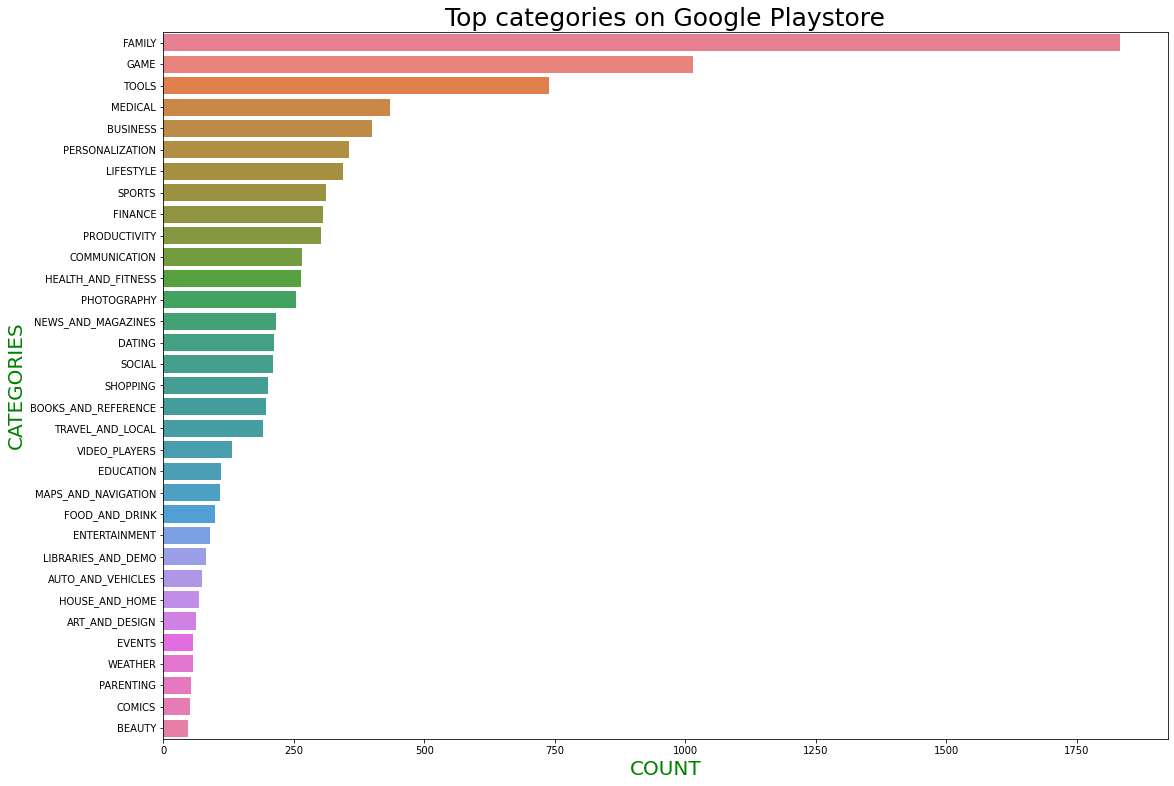

In [ ]:
plt.figure(figsize=(18,13))
barchart= sns.barplot(x = x, y =y, palette= "husl")
barchart.set_title("Top categories on Google Playstore", fontsize = 25);
plt.xlabel("COUNT",fontsize=20,color='green')
plt.ylabel("CATEGORIES",fontsize=20,color='green')


**2-Which category of Apps from the ‘Content Rating’ column is found more on the play store?**

In [ ]:
x2=playdata['Content Rating'].value_counts().index
y2=playdata['Content Rating'].value_counts()

Text(0.5, 0, 'Content Rating')

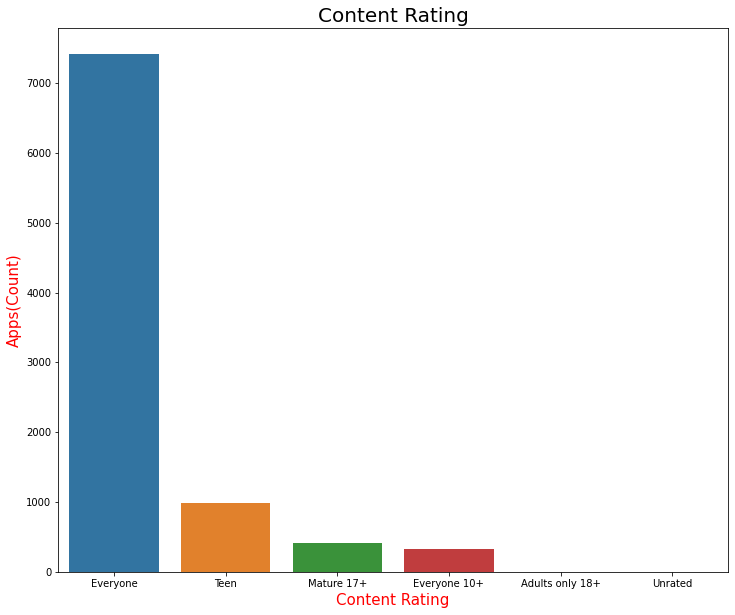

In [ ]:
plt.figure(figsize=(12,10))
n=sns.barplot(x=x2,y=y2)
n.set_title('Content Rating',size = 20);
plt.ylabel('Apps(Count)',fontsize=15,color='red')
plt.xlabel('Content Rating',fontsize=15,color='red')

**3-Let’s plot a visualization graph to view what portion of the apps in the play store are paid and free.**

In [ ]:
map=playdata['Type'].value_counts()
index=playdata['Type'].value_counts().index

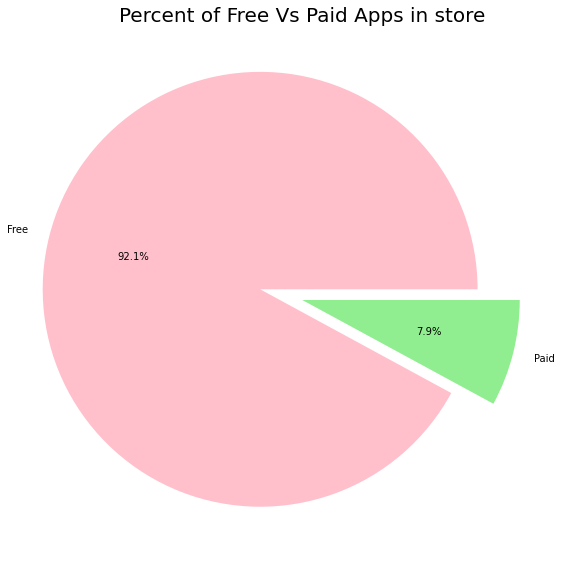

In [ ]:
plt.figure(figsize=(10,10))
#labels = googlestore_df['Type'].value_counts(sort = True).index
#sizes = googlestore_df['Type'].value_counts(sort = True)
colors = ["pink","lightgreen"]
explode = (0.2,0)
plt.pie(map, explode=explode, labels=index,autopct='%1.1f%%', colors=colors)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

**From the above graph, we can see that 92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.**

**4-Which category App’s have the most number of installs?**


In [ ]:
most_install=playdata.groupby('Category')[['Installs']].sum()
sorting_most_install=most_install.sort_values(by='Installs',ascending=False)
category2=sorting_most_install.index
#sorting_most_install
d=sorting_most_install
d

,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815
PRODUCTIVITY,2742312744
PHOTOGRAPHY,2557897655
SHOPPING,1504248785
SPORTS,1138949498


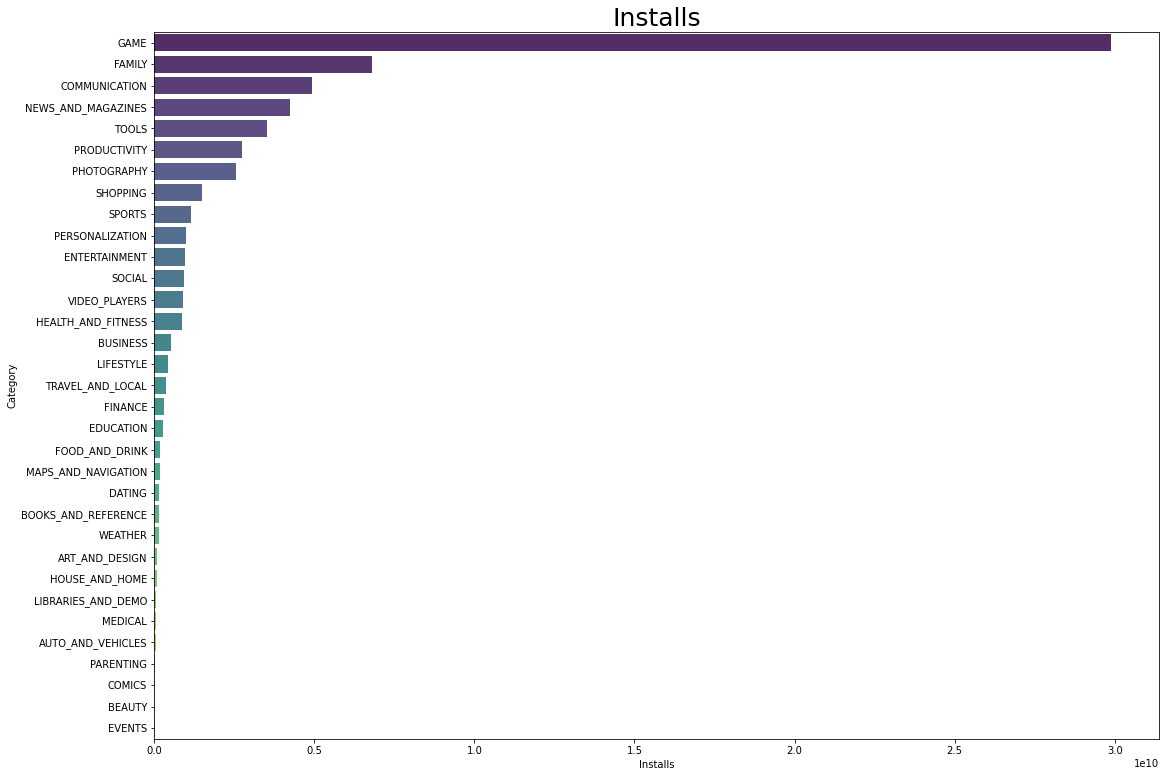

In [ ]:
x2sis = []
y2sis = []

for i in range(len(sorting_most_install)):
    x2sis.append(sorting_most_install.Installs[i])
    y2sis.append(sorting_most_install.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

In [ ]:
plt.figure(figsize=(18,13))
install= sns.barplot(x =sorting_most_install, y =category2,alpha =0.9, palette= "viridis")
install.set_title("Most number of Installed App", fontsize = 25);
plt.xlabel("COUNT",fontsize=20,color='green')
plt.ylabel("Category",fontsize=20,color='green')

ValueError: ignored

<Figure size 1296x936 with 0 Axes>

**5-What are the Top 10 installed apps in any category?**

In [ ]:
def top10appincategory(str):
    str = str.upper()
    top10 = playdata[playdata['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)

    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)



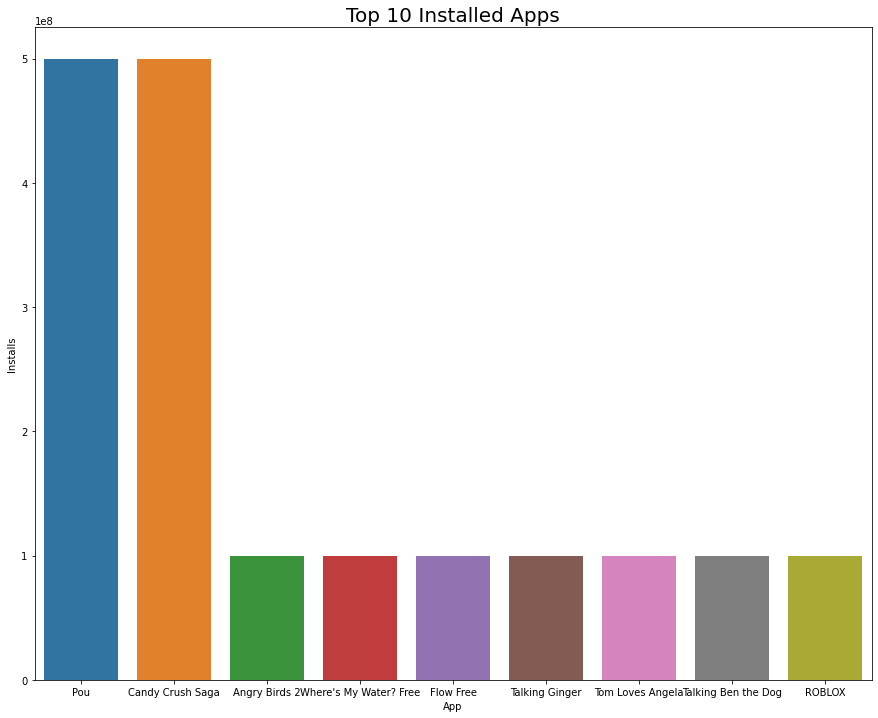

In [ ]:
top10appincategory('family')

**6-Which are the top 10 expensive Apps in the play store?**

In [ ]:
expensive=playdata[playdata['Type']=='Paid'].sort_values(by='Price',ascending=False)

In [ ]:
expensive10=expensive[['App','Installs']].head(10)
expensive10

,App,Installs
4367,I'm Rich - Trump Edition,10000
5356,I Am Rich Premium,50000
5364,I am rich (Most expensive app),1000
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0
4362,💎 I'm rich,10000
4197,most expensive app (H),100
5351,I am rich,100000
5354,I am Rich Plus,10000
5373,I AM RICH PRO PLUS,1000
5369,I am Rich,5000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_te

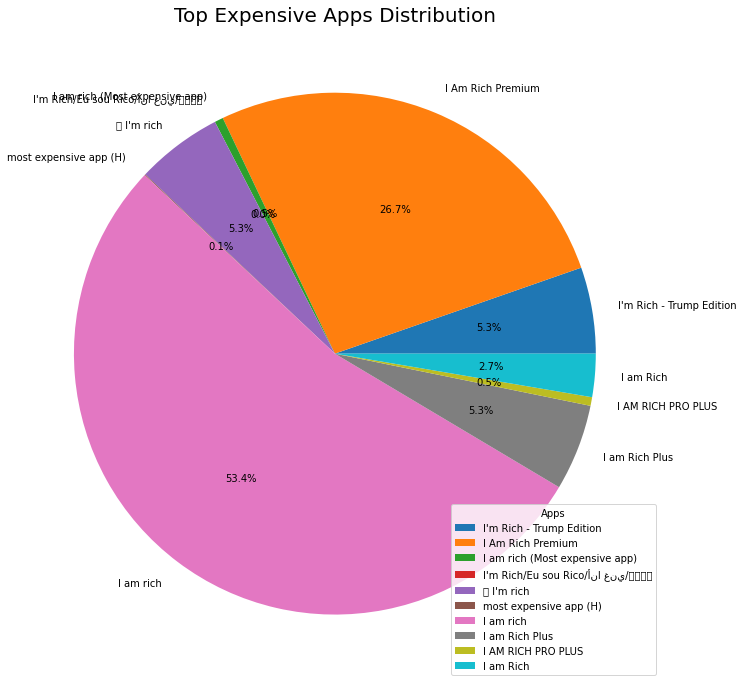

In [ ]:
plt.figure(figsize=(15,12));
plt.pie(expensive10.Installs, explode=None, labels=expensive10.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(expensive10.App,
           loc="lower right",
           title="Apps",

          );

**From the above graph, we can interpret that the App I am rich is the most expensive app in the google play store**

**7-Which are the Apps with the highest number of reviews?**

In [ ]:
highest_rev = playdata.sort_values(by='Reviews', ascending=False)

In [ ]:
apphighestrev=highest_rev[['App','Reviews']]

In [ ]:
highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2989,GollerCepte Live Score,SPORTS,4.2,9992,31000000.0,1000000,Free,0.00,Everyone,Sports,"May 23, 2018"
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91000.0,100000,Free,0.00,Everyone,Tools,"December 17, 2013"
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18000000.0,1000000,Free,0.00,Everyone,Shopping,"January 22, 2018"
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18000000.0,1000000,Free,0.00,Everyone,Shopping,"January 22, 2018"
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33000000.0,1000000,Free,0.00,Everyone,Sports,"June 5, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
7224,Ceasa CE,TOOLS,4.4,0,4000000.0,50,Free,0.00,Everyone,Tools,"June 13, 2018"
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.4,0,40000000.0,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017"
7225,CE Genius Nurses Edition,MEDICAL,4.4,0,5100000.0,1,Paid,3.99,Everyone,Medical,"June 1, 2018"
9938,EU FP7 SAM,BUSINESS,4.4,0,9700000.0,10,Free,0.00,Everyone,Business,"March 12, 2015"


**8-What are the count of Apps in different genres?**

In [ ]:
topAppsinGenres = playdata['Genres'].value_counts().head(50)
topappgenre=topAppsinGenres.index


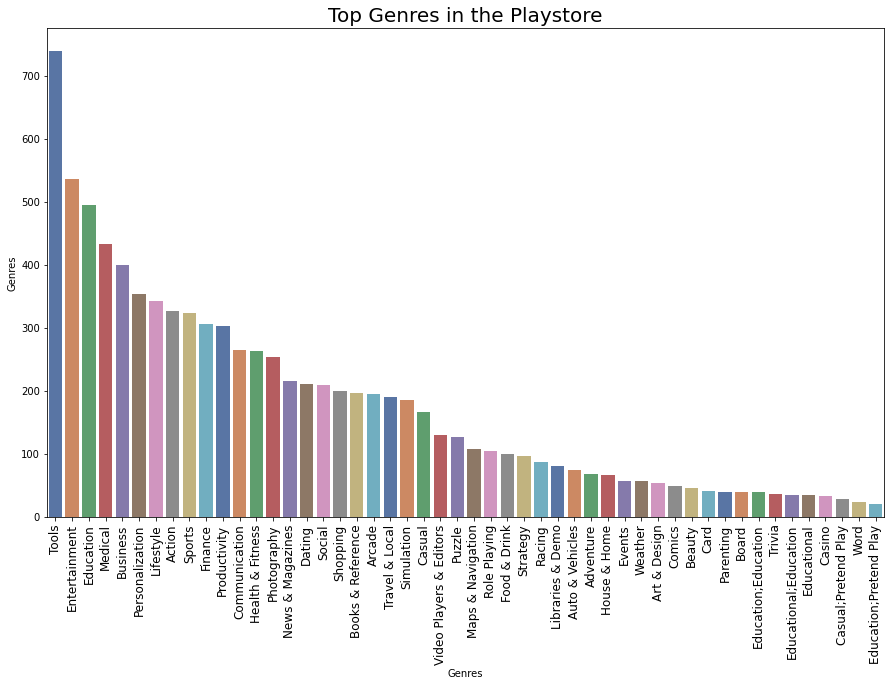

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=topappgenre,y=topAppsinGenres,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

**9-Which are the apps that have made the highest-earning?**

In [ ]:
Paid = playdata[playdata['Type'] == 'Paid']

In [ ]:
earning= Paid[['App', 'Installs', 'Price']]

In [ ]:
earning['Earnings'] = earning['Installs'] * earning['Price'];

<ipython-input-60-fd3c9aa40126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earning['Earnings'] = earning['Installs'] * earning['Price'];


In [ ]:
earningsortedearn= earning.sort_values(by='Earnings', ascending=False).head(50)

In [ ]:
earningsortedprice= earningsortedearn.sort_values(by='Price', ascending=False)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


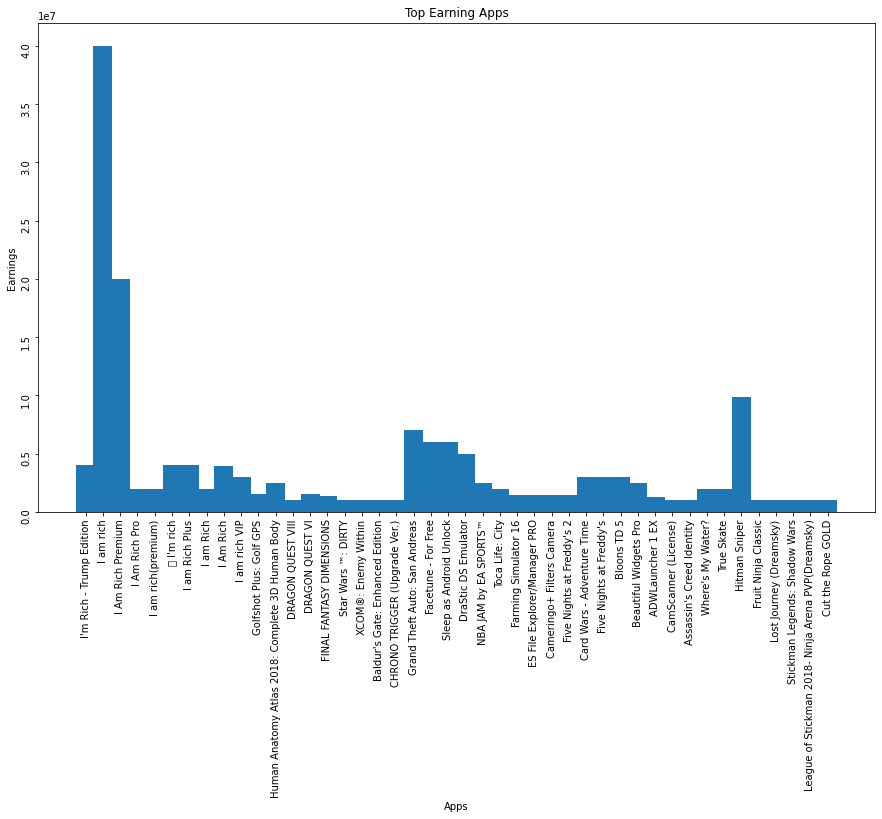

In [ ]:
plt.figure(figsize=(15,9))
plt.bar(earningsortedprice.App, earningsortedprice.Earnings, width=1.1, label=earningsortedprice.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

In [ ]:
playdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9600000.0,10,Free,0.0,Everyone,Business,"September 29, 2016"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017"


**10-Let’s have a look at the distribution of the ratings of the data frame.**

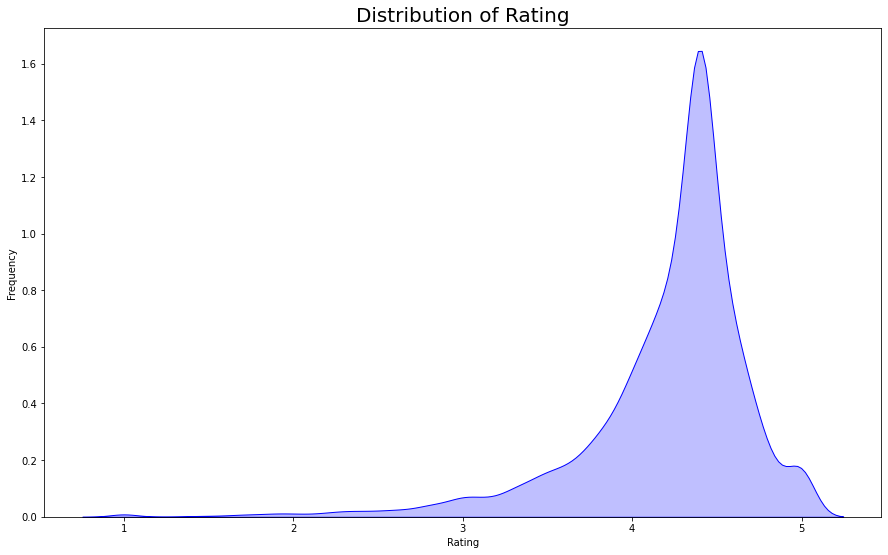

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(playdata.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

**From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8.**

In [ ]:
playdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9600000.0,10,Free,0.0,Everyone,Business,"September 29, 2016"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017"
